In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Data : Fraud_check

## Importing the dataset

In [2]:
fraud =  pd.read_csv("/content/Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Dataset = Fraud_check 

Informarion:

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

## Basic analysis and descriptives of the data

In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Correlation plot

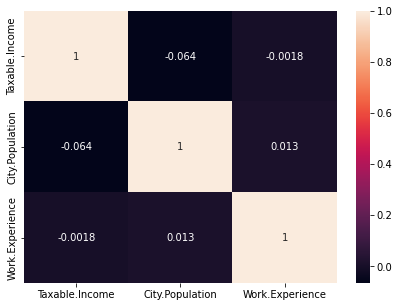

In [5]:
plt.figure(figsize=(7,5))
sns.heatmap(fraud.corr(), annot=True)

## Decoding the dependent variable

In [6]:
fraud['Taxable.Income'] = np.where( fraud['Taxable.Income'] <= 30000, 1, 0)
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [7]:
fraud['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

## Encoding the independent variables

In [8]:
data_fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'])
data_fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


## Scaling the data

In [9]:
scaler = MinMaxScaler()
scaled_data1=pd.DataFrame(scaler.fit_transform(data_fraud),columns=data_fraud.columns, index=data_fraud.index)
scaled_data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [10]:
x=scaled_data1.drop(['Taxable.Income'], axis=1)
y=scaled_data1["Taxable.Income"]

In [11]:
columns=x.columns

In [12]:
y.value_counts()

0.0    476
1.0    124
Name: Taxable.Income, dtype: int64

As, the data is highly imbalanced, we shall make it balanced using oversampling.

## Resampling the data

In [13]:
x= np.array(x)
y= np.array(y)

In [14]:
over_sampler = SMOTE(random_state=42)
x_res, y_res = over_sampler.fit_resample(x, y)

The data is balanced, hence we shall move further.

## Splitting the data using train test split.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=42)

## Deciding the best parameter

In [16]:
for x in range(2,20,1): # range for n_estimators
    acc = []
    for i in range(2,20,1): # range for max_depth
        model = RandomForestClassifier(bootstrap=True,n_estimators = x ,max_depth=i , random_state = 42)
        model.fit(x_train, y_train)
        train=model.score(x_train, y_train)
        test=model.score(x_test, y_test)
        acc.append([train, test])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[0] for i in acc],
                    mode='lines+markers',
                    name='Training'))
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[1] for i in acc],
                    mode='lines+markers',
                    name='Testing'))
    fig.update_layout(title=x,
                   xaxis_title='Max-depth',
                   yaxis_title='Accuracy')
    fig.show()

Seeing to the graphs, we can say that the max-depth of 5, with the n_estimators as 10, seems to be the most ideal one, as at this values we are able to achieve the optimum accuracy with less gap between the training and testing accuracy so as to keep the overfitting under control.

## Building the model

In [17]:
rfc = RandomForestClassifier(bootstrap=True,n_estimators = 10 ,max_depth=5 , random_state = 42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [18]:
# features = columns.values # The name of each column
# classes = ['0', '1'] # The name of each class
# # You can also use low, medium and high risks in the same order instead
# # classes = ['low risk', 'medium risk', 'high risk']

# for estimator in rfc.estimators_:
#     print(estimator)
#     plt.figure(figsize=(20,6),dpi=700)
#     tree.plot_tree(estimator,
#                    feature_names=features,
#                    class_names=classes,
#                    fontsize=7, 
#                    filled=True, 
#                    rounded=True,
#                    )
#     plt.show()

In [19]:
# Making predictions
y_pred = rfc.predict(x_test)
pd.Series(y_pred).value_counts()

1.0    166
0.0    120
dtype: int64

## Model Evaluation

In [20]:
# training and testing scores
print('Training set score: {:.4f}'.format(rfc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(x_test, y_test)))

Training set score: 0.7357
Test set score: 0.6224


              precision    recall  f1-score   support

         0.0       0.66      0.54      0.59       146
         1.0       0.60      0.71      0.65       140

    accuracy                           0.62       286
   macro avg       0.63      0.62      0.62       286
weighted avg       0.63      0.62      0.62       286



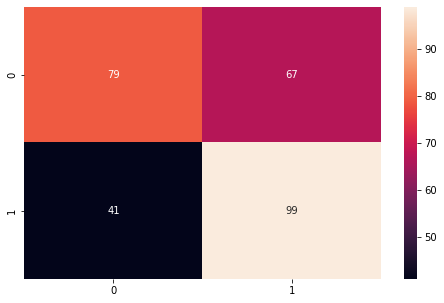

In [21]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_test,y_pred))

In [22]:
# Accuracy Score
print("Accuracy_score", accuracy_score(y_test,y_pred)*100)

Accuracy_score 62.23776223776224




 ROC AUC score: 0.6241193737769081 




Text(0, 0.5, 'True Positive Rate')

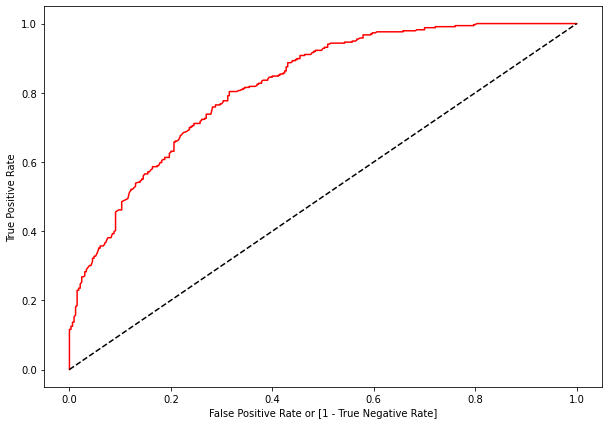

In [23]:
# AUC and ROC
fpr, tpr, thresholds = roc_curve(y_train, rfc.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')